In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
import seaborn.apionly as snsa
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy
import warnings


%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.serif'] = 'Arial'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.prop_cycle'] = cycler('color',tableau20)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14

pd.set_option('display.max_columns', None)

In [4]:
feats = ["('Team Information', 'Building Characteristics', 'Gross Floor Area')",
"('Team Information', 'Building Characteristics', '# of above grade floors')",
"('Team Information', 'Building Characteristics', '# of below grade floors')",
"('Team Information', 'Building Characteristics', 'Year of construction/substantial Rehabilitation')",
"('Metering Configuration', 'Benchmarking', 'facility type')",
"('Metering Configuration', 'Benchmarking', 'weather normalized source EUI')",
"('Metering Configuration', 'Benchmarking', 'site energy intensity')",
"('Heating Component', 'Heating System 1', 'Heating System Type')",
"('Heating Component', 'Heating System 1', 'Fuel sources')",
"('Cooling Component', 'Cooling System 1', 'cooling system type')",
"('Cooling Component', 'Cooling System 1', 'Air/Water Cooled?')",
"('Cooling Component', 'Cooling System 1', 'Quantity')",
"('Cooling Component', 'Cooling System 1', 'Fuel Source')",
"('Lighting Component', 'Lighting Type 1', 'Lamp Type')",
"('Exterior Walls', 'Exterior wall type 1', 'wall type')",
"('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')",
"('Envelope', 'Window Type 1', 'framing material type')",
"('Envelope', 'Window Type 1', '# of panes ')",
"('Existing Annual Energy Use', 'Electricity', 'space heating')",
"('Existing Annual Energy Use', 'Electricity', 'Domestic Hot water')",
"('Existing Annual Energy Use', 'Electricity', 'space cooling')",
"('Existing Annual Energy Use', 'Electricity', 'ventilation')",
"('Existing Annual Energy Use', 'Electricity', 'Lighting')",
"('Existing Annual Energy Use', 'Electricity', 'Conveyance')",
"('Existing Annual Energy Use', 'Electricity', 'Process Loads')",
"('Existing Annual Energy Use', 'Electricity', 'Plug loads/misc')",
"('Existing Annual Energy Use', 'Electricity', 'other')",
"('Existing Annual Energy Use', 'Electricity', 'Total Estimated')",
"('Existing Annual Energy Use', 'Electricity', 'Total per sq')",
"('Existing Annual Energy Use', 'Natural Gas', 'space heating')",
"('Existing Annual Energy Use', 'Natural Gas', 'Domestic Hot water')",
"('Existing Annual Energy Use', 'Natural Gas', 'Plug loads/misc')",
"('Existing Annual Energy Use', 'Natural Gas', 'Total Estimated')",
"('Existing Annual Energy Use', 'Natural Gas', 'Total per sq')",
"('Existing Annual Energy Use', 'Fuel Oil', 'space heating')",
"('Existing Annual Energy Use', 'Fuel Oil', 'Domestic Hot water')",
"('Existing Annual Energy Use', 'Fuel Oil', 'Total Estimated')",
"('Existing Annual Energy Use', 'Fuel Oil', 'Total per sq')",
"('Existing Annual Energy Use', 'Steam', 'Total Estimated')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'space heating')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Domestic Hot water')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'space cooling')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'ventilation')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Lighting')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Conveyance')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Process Loads')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Plug loads/misc')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'other')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Total Estimated')",
"('Existing Annual Energy Use', 'Total Site Energy Use', 'Total per sq')",
'Year Built', 'Weather Normalized Source EUI (kBtu/ft_2)','Office - Number of Workers on Main Shift', 'Office - Weekly Operating Hours',
'Office - Worker Density (Number per 1,000 ft_2)']

In [5]:
df = pd.read_csv('..\Data\merged_LL84_LL87.csv', usecols=feats)

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (854,907,908,909,912,913,914,858,39,436,910,846,847,848,849,851,852,853,859,865,871,892) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = df[df["('Metering Configuration', 'Benchmarking', 'facility type')"] == 'Office']

df.reset_index(inplace=True)
df = df.drop('index',axis=1)

In [7]:
df['eui'] = df["('Metering Configuration', 'Benchmarking', 'weather normalized source EUI')"]

In [8]:
df.replace(to_replace='Not Available', value=np.nan, inplace=True)
df.replace(to_replace='NA', value=np.nan, inplace=True)
df.replace(to_replace='n/a', value=np.nan, inplace=True)
df.replace(to_replace='\t', value=' ', inplace=True)
df.replace(to_replace=u'\u2022', value=' ', inplace=True)
df.replace(to_replace='24 + Penthouse', value=24, inplace=True)
df.replace(to_replace='-', value='', inplace=True)

In [9]:
df['eui'] = df['eui'].astype(float)
df['log_eui'] = np.log(df['eui'])
df["('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')"] = df["('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')"].astype(float)
df["('Team Information', 'Building Characteristics', 'Gross Floor Area')"] = df["('Team Information', 'Building Characteristics', 'Gross Floor Area')"].astype(float)
df["('Team Information', 'Building Characteristics', '# of above grade floors')"] = df["('Team Information', 'Building Characteristics', '# of above grade floors')"].astype(float)

In [10]:
df = df.dropna(subset=['eui'])
df.reset_index(inplace=True)
df = df.drop('index',axis=1)

In [11]:
def clean_eui(df):
    """Takes the logarithm of EUI for a particular building type and filters out
    examples that fall outside the threshold of two standard deviations.
    
    Returns outlier-free dataframe."""
    
    df = df[(df.log_eui<np.mean(df.log_eui)+2*np.std(df.log_eui))&(df.log_eui>np.mean(df.log_eui)-2*np.std(df.log_eui))]
    return df

df = clean_eui(df)
df.head()

,"('Team Information', 'Building Characteristics', 'Gross Floor Area')","('Team Information', 'Building Characteristics', '# of above grade floors')","('Team Information', 'Building Characteristics', '# of below grade floors')","('Team Information', 'Building Characteristics', 'Year of construction/substantial Rehabilitation')","('Metering Configuration', 'Benchmarking', 'facility type')","('Metering Configuration', 'Benchmarking', 'weather normalized source EUI')","('Metering Configuration', 'Benchmarking', 'site energy intensity')","('Heating Component', 'Heating System 1', 'Heating System Type')","('Heating Component', 'Heating System 1', 'Fuel sources')","('Cooling Component', 'Cooling System 1', 'cooling system type')","('Cooling Component', 'Cooling System 1', 'Air/Water Cooled?')","('Cooling Component', 'Cooling System 1', 'Quantity')","('Cooling Component', 'Cooling System 1', 'Fuel Source')","('Lighting Component', 'Lighting Type 1', 'Lamp Type')","('Exterior Walls', 'Exterior wall type 1', 'wall type')","('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')","('Envelope', 'Window Type 1', 'framing material type')","('Envelope', 'Window Type 1', '# of panes ')","('Existing Annual Energy Use', 'Electricity', 'space heating')","('Existing Annual Energy Use', 'Electricity', 'Domestic Hot water')","('Existing Annual Energy Use', 'Electricity', 'space cooling')","('Existing Annual Energy Use', 'Electricity', 'ventilation')","('Existing Annual Energy Use', 'Electricity', 'Lighting')","('Existing Annual Energy Use', 'Electricity', 'Conveyance')","('Existing Annual Energy Use', 'Electricity', 'Process Loads')","('Existing Annual Energy Use', 'Electricity', 'Plug loads/misc')","('Existing Annual Energy Use', 'Electricity', 'other')","('Existing Annual Energy Use', 'Electricity', 'Total Estimated')","('Existing Annual Energy Use', 'Electricity', 'Total per sq')","('Existing Annual Energy Use', 'Natural Gas', 'space heating')","('Existing Annual Energy Use', 'Natural Gas', 'Domestic Hot water')","('Existing Annual Energy Use', 'Natural Gas', 'Plug loads/misc')","('Existing Annual Energy Use', 'Natural Gas', 'Total Estimated')","('Existing Annual Energy Use', 'Natural Gas', 'Total per sq')","('Existing Annual Energy Use', 'Fuel Oil', 'space heating')","('Existing Annual Energy Use', 'Fuel Oil', 'Domestic Hot water')","('Existing Annual Energy Use', 'Fuel Oil', 'Total Estimated')","('Existing Annual Energy Use', 'Fuel Oil', 'Total per sq')","('Existing Annual Energy Use', 'Steam', 'Total Estimated')","('Existing Annual Energy Use', 'Total Site Energy Use', 'space heating')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Domestic Hot water')","('Existing Annual Energy Use', 'Total Site Energy Use', 'space cooling')","('Existing Annual Energy Use', 'Total Site Energy Use', 'ventilation')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Lighting')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Conveyance')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Process Loads')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Plug loads/misc')","('Existing Annual Energy Use', 'Total Site Energy Use', 'other')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Total Estimated')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Total per sq')",Year Built,Weather Normalized Source EUI (kBtu/ft_2),Office - Number of Workers on Main Shift,Office - Weekly Operating Hours,"Office - Worker Density (Number per 1,000 ft_2)",eui,log_eui
0,56250.0,12.0,1,1909,Office,162.8,63.1,Steam Boiler,#4 Oil,NaN,NaN,NaN,NaN,T12,Steel-Framed,0.258,Aluminum,Single,NaN,20218.3470106,151804,2536.08,13488.56935,24496.2,NaN,9967.21,547650.700264,7.701616e+05,13.691762,NaN,NaN,NaN,6.986742,0.000124,6450.857143,NaN,6450.857143,0.114682,0,9.418251e+05,68985.0,517957,8653.11,46022.9986217,83581.173546,NaN,34008.1,1869282.86354,3.570315e+06,63.472271,1941,104.4,NaN,NaN,NaN,162.8,5.092522


In [12]:
def to_kbtu_ft2(x):
    return x*(0.9478/10.764)

# Source EUI calculated from the DOE reference building
refEUI = to_kbtu_ft2(2185)

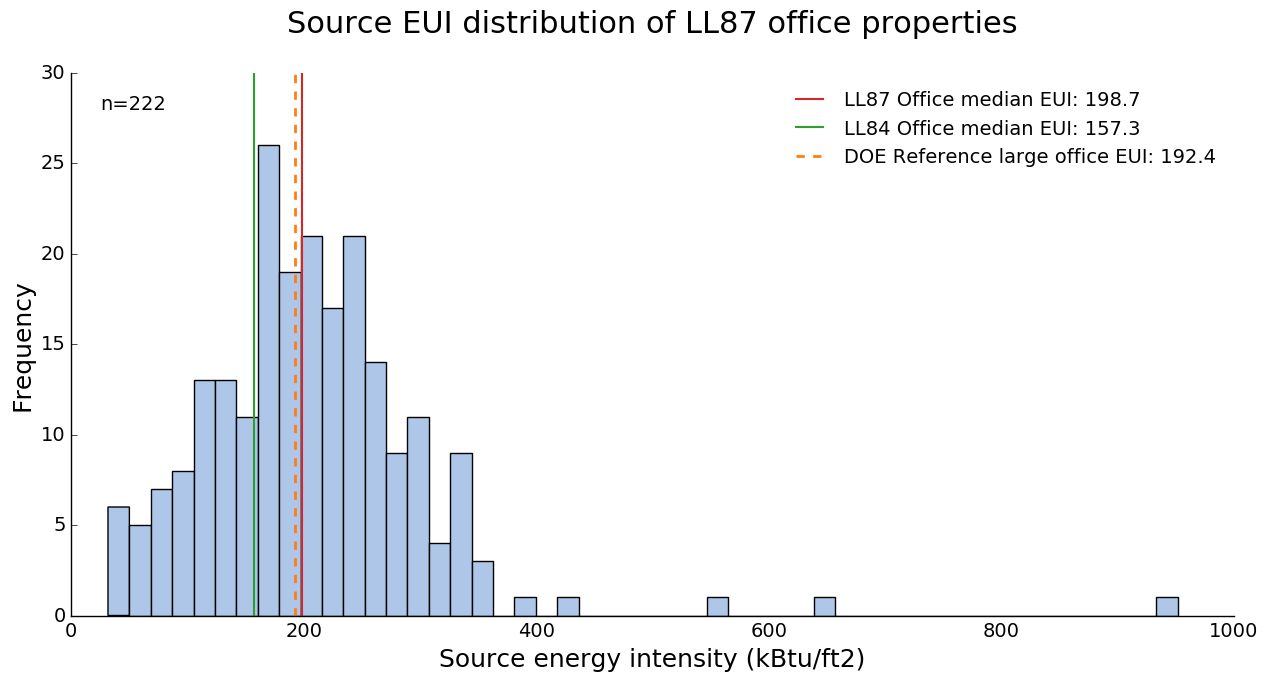

In [13]:
plt.figure(figsize=(15,7))
plt.title('Source EUI distribution of LL87 office properties\n')
plt.hist(df.eui,bins=50,color=tableau20[1])
plt.axvline(x=df.eui.median(), color=tableau20[6], linewidth=1.5, 
            linestyle='-', label='LL87 Office median EUI: %.1f'%df.eui.median())
plt.axvline(x=df['Weather Normalized Source EUI (kBtu/ft_2)'].median(), color=tableau20[4],linewidth=1.5,
            label='LL84 Office median EUI: %.1f'%df['Weather Normalized Source EUI (kBtu/ft_2)'].median())
plt.axvline(x=refEUI, color=tableau20[2],linewidth=2, linestyle='--',
            label='DOE Reference large office EUI: %.1f'%refEUI)
plt.ylabel('Frequency')
plt.xlabel('Source energy intensity (kBtu/ft2)')
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.text(25, 28, 'n=%d'%len(df.eui),fontsize=14)
plt.legend()
#plt.savefig('..\Figures\LL87_all_office_EUI.png')
plt.show()

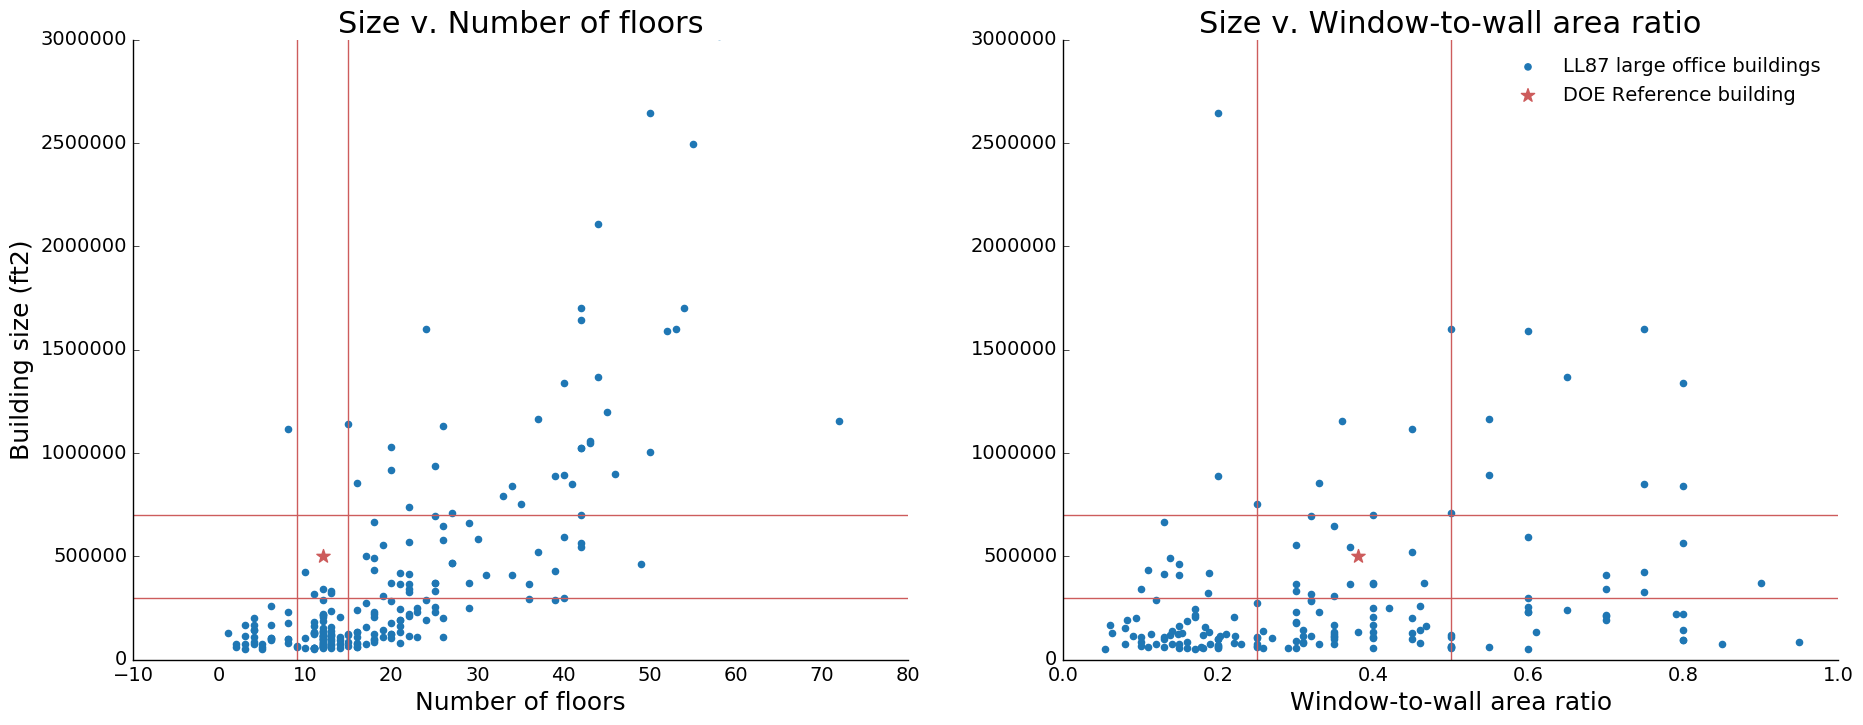

In [14]:
plt.figure(figsize=(22,8))
plt.subplot(121)
plt.title('Size v. Number of floors')
plt.scatter(df["('Team Information', 'Building Characteristics', '# of above grade floors')"], 
            df["('Team Information', 'Building Characteristics', 'Gross Floor Area')"], color=tableau20[0],
           label='LL87 large office buildings')
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.scatter(12, 500000, marker="*",s=100, color='indianred', label='DOE Reference building')
plt.axhline(y=300000,color='indianred')
plt.axhline(y=700000,color='indianred')
plt.axvline(x=9,color='indianred')
plt.axvline(x=15,color='indianred')
plt.xlabel('Number of floors')
plt.ylabel('Building size (ft2)')
plt.ylim(0,3000000)
plt.subplot(122)
plt.title('Size v. Window-to-wall area ratio')
plt.scatter(df["('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')"], 
            df["('Team Information', 'Building Characteristics', 'Gross Floor Area')"], color=tableau20[0],
           label='LL87 large office buildings')
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.scatter(0.38, 500000, marker="*",s=100, color='indianred', label='DOE Reference building')
plt.axhline(y=300000,color='indianred')
plt.axhline(y=700000,color='indianred')
plt.axvline(x=0.25,color='indianred')
plt.axvline(x=0.5,color='indianred')
plt.xlabel('Window-to-wall area ratio')
plt.xlim(0,1)
plt.ylim(0,3e6)
plt.legend(loc='best',scatterpoints = 1)
plt.savefig('..\Figures\sizeVfloorsVfar.png')
#plt.show()

### LEft: NYC expanding vertically. Buildings of same size have larger height, not much space.


In [15]:
def find_peers(z):
    
    """Accepts a dataframe and outputs filtered values to create 
    DOE reference building NYC peers."""
    
    z = z[(z["('Envelope', 'Window Type 1', '# of panes ')"] == 'Single')]
    z = z[(z["Year Built"]<1980)]
    z = z[(z["('Heating Component', 'Heating System 1', 'Fuel sources')"] != 'District Steam')]  
    val = z[(z["('Cooling Component', 'Cooling System 1', 'Fuel Source')"] == 'Electric')]
 
    return val

# Find peers
peers = find_peers(df)

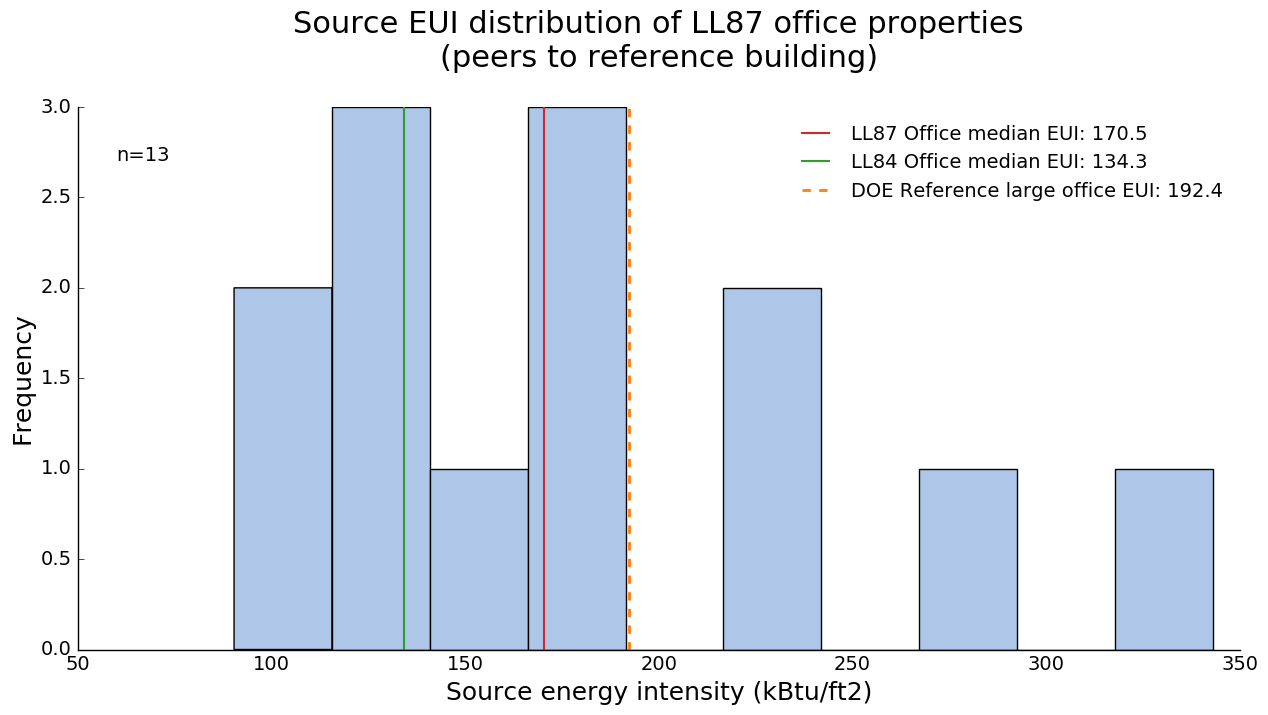

In [16]:
plt.figure(figsize=(15,7))
plt.title('Source EUI distribution of LL87 office properties\n(peers to reference building)\n')
plt.hist(peers.eui,bins=10,color=tableau20[1])
plt.axvline(x=peers.eui.median(), color=tableau20[6], linewidth=1.5, 
            linestyle='-', label='LL87 Office median EUI: %.1f'%peers.eui.median())
plt.axvline(x=peers['Weather Normalized Source EUI (kBtu/ft_2)'].median(), color=tableau20[4],linewidth=1.5,
            label='LL84 Office median EUI: %.1f'%peers['Weather Normalized Source EUI (kBtu/ft_2)'].median())
plt.axvline(x=refEUI, color=tableau20[2],linewidth=2, linestyle='--',
            label='DOE Reference large office EUI: %.1f'%refEUI)
plt.ylabel('Frequency')
plt.xlabel('Source energy intensity (kBtu/ft2)')
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.text(60, 2.7, 'n=%d'%len(peers.eui),fontsize=14)
plt.legend()
#plt.savefig('..\Figures\LL87_peer_EUI.png')
plt.show()

## The threshold compared to peers is quite higher than the NYC one. 
LL84 patsavoura pali.
NYC buildings perform better than the reference. 
Two possible reasons: 1) More efficient, 2) In a pioneering city in energy efficiency, old buildings with such poor specifications do not attract intense users eg. IT, trading etc. On the other hand, might be occupied 

In [17]:
# Calculate the building area per floor
df['area_per_floor'] = df["('Team Information', 'Building Characteristics', 'Gross Floor Area')"]/df["('Team Information', 'Building Characteristics', '# of above grade floors')"]

candidates = df[(df['area_per_floor'] < 60000) & (df['area_per_floor'] > 20000)]

#Inspect buildings to select the one to study
candidates.head()

,"('Team Information', 'Building Characteristics', 'Gross Floor Area')","('Team Information', 'Building Characteristics', '# of above grade floors')","('Team Information', 'Building Characteristics', '# of below grade floors')","('Team Information', 'Building Characteristics', 'Year of construction/substantial Rehabilitation')","('Metering Configuration', 'Benchmarking', 'facility type')","('Metering Configuration', 'Benchmarking', 'weather normalized source EUI')","('Metering Configuration', 'Benchmarking', 'site energy intensity')","('Heating Component', 'Heating System 1', 'Heating System Type')","('Heating Component', 'Heating System 1', 'Fuel sources')","('Cooling Component', 'Cooling System 1', 'cooling system type')","('Cooling Component', 'Cooling System 1', 'Air/Water Cooled?')","('Cooling Component', 'Cooling System 1', 'Quantity')","('Cooling Component', 'Cooling System 1', 'Fuel Source')","('Lighting Component', 'Lighting Type 1', 'Lamp Type')","('Exterior Walls', 'Exterior wall type 1', 'wall type')","('Exterior Walls', 'Exterior wall type 5', 'vertical glazing % of wall')","('Envelope', 'Window Type 1', 'framing material type')","('Envelope', 'Window Type 1', '# of panes ')","('Existing Annual Energy Use', 'Electricity', 'space heating')","('Existing Annual Energy Use', 'Electricity', 'Domestic Hot water')","('Existing Annual Energy Use', 'Electricity', 'space cooling')","('Existing Annual Energy Use', 'Electricity', 'ventilation')","('Existing Annual Energy Use', 'Electricity', 'Lighting')","('Existing Annual Energy Use', 'Electricity', 'Conveyance')","('Existing Annual Energy Use', 'Electricity', 'Process Loads')","('Existing Annual Energy Use', 'Electricity', 'Plug loads/misc')","('Existing Annual Energy Use', 'Electricity', 'other')","('Existing Annual Energy Use', 'Electricity', 'Total Estimated')","('Existing Annual Energy Use', 'Electricity', 'Total per sq')","('Existing Annual Energy Use', 'Natural Gas', 'space heating')","('Existing Annual Energy Use', 'Natural Gas', 'Domestic Hot water')","('Existing Annual Energy Use', 'Natural Gas', 'Plug loads/misc')","('Existing Annual Energy Use', 'Natural Gas', 'Total Estimated')","('Existing Annual Energy Use', 'Natural Gas', 'Total per sq')","('Existing Annual Energy Use', 'Fuel Oil', 'space heating')","('Existing Annual Energy Use', 'Fuel Oil', 'Domestic Hot water')","('Existing Annual Energy Use', 'Fuel Oil', 'Total Estimated')","('Existing Annual Energy Use', 'Fuel Oil', 'Total per sq')","('Existing Annual Energy Use', 'Steam', 'Total Estimated')","('Existing Annual Energy Use', 'Total Site Energy Use', 'space heating')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Domestic Hot water')","('Existing Annual Energy Use', 'Total Site Energy Use', 'space cooling')","('Existing Annual Energy Use', 'Total Site Energy Use', 'ventilation')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Lighting')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Conveyance')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Process Loads')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Plug loads/misc')","('Existing Annual Energy Use', 'Total Site Energy Use', 'other')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Total Estimated')","('Existing Annual Energy Use', 'Total Site Energy Use', 'Total per sq')",Year Built,Weather Normalized Source EUI (kBtu/ft_2),Office - Number of Workers on Main Shift,Office - Weekly Operating Hours,"Office - Worker Density (Number per 1,000 ft_2)",eui,log_eui,area_per_floor
7,892000.0,40.0,2,1958,Office,552.1,221.7,Other,District Steam,Chiller - Centrifugal,Water Cooled,2,District Steam,Halogen,Steel-Framed,0.55,Aluminum,Single,0,0,3.18635e+06,3.99186e+06,8481235.0,1.361e+06,577565,1.11045e+07,1581444,30284000.0,33.950673,0,0,0,NaN,0.000000,0.0,0,NaN,0.0,60181,29306730.0,2793960,3.81356e+07,1.36202e+07,28937973.82,4643732.000,14462279.78,3.78887e+07,5395886.928,1.751851e+08,196.395877,19

In [18]:
# Selected building (BIN: 1002933)
selBldg = df.ix[184]

# Selected building properties
selBldg

('Team Information', 'Building Characteristics', 'Gross Floor Area')                                         342644
('Team Information', 'Building Characteristics', '# of above grade floors')                                      12
('Team Information', 'Building Characteristics', '# of below grade floors')                                       1
('Team Information', 'Building Characteristics', 'Year of construction/substantial Rehabilitation')            1928
('Metering Configuration', 'Benchmarking', 'facility type')                                                  Office
('Metering Configuration', 'Benchmarking', 'weather normalized source EUI')                                    72.1
('Metering Configuration', 'Benchmarking', 'site energy intensity')                                           159.1
('Heating Component', 'Heating System 1', 'Heating System Type')                                       Steam Boiler
('Heating Component', 'Heating System 1', 'Fuel sources')               

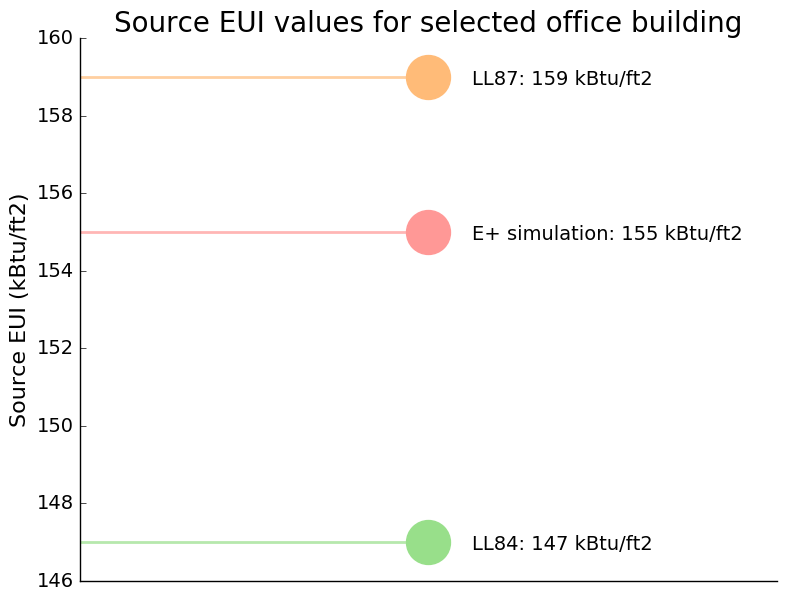

In [19]:
plt.figure(figsize=(9,7))
plt.title('Source EUI values for selected office building',size=20)
plt.scatter(1, 159, color=tableau20[3], s=1000)
plt.ylabel('Source EUI (kBtu/ft2)',size=16)
plt.axhline(y=159,xmin=0,xmax=0.5, color=tableau20[3], linewidth=2,alpha=.7)
plt.text(1.005, 158.8, 'LL87: 159 kBtu/ft2', fontsize=14)
plt.scatter(1, 147, color=tableau20[5], s=1000)
plt.axhline(y=147,xmin=0,xmax=0.5, color=tableau20[5], linewidth=2,alpha=.7)
plt.text(1.005, 146.8, 'LL84: 147 kBtu/ft2', fontsize=14)
plt.scatter(1, 155, color=tableau20[7], s=1000)
plt.axhline(y=155,xmin=0,xmax=0.5, color=tableau20[7], linewidth=2,alpha=.7)
plt.text(1.005, 154.8, 'E+ simulation: 155 kBtu/ft2', fontsize=14)
plt.xticks([1],[''])
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
#plt.savefig('..\Figures\EUIs_selected_bldg.png')
plt.show()

### Na pw gia ti diafora pou eixan sto submission, mperdepse source me site

In [20]:
# Calculate the energy mix from LL87 data
selBldgEnerMix = selBldg[["('Existing Annual Energy Use', 'Total Site Energy Use', 'space heating')",
                        "('Existing Annual Energy Use', 'Total Site Energy Use', 'Domestic Hot water')",
                        "('Existing Annual Energy Use', 'Electricity', 'space cooling')",
                        "('Existing Annual Energy Use', 'Total Site Energy Use', 'Lighting')",
                        "('Existing Annual Energy Use', 'Total Site Energy Use', 'Conveyance')",
                        "('Existing Annual Energy Use', 'Total Site Energy Use', 'other')",
                        "('Existing Annual Energy Use', 'Total Site Energy Use', 'Total Estimated')"]]

# Percentage of each end use
per_heat_sel = selBldgEnerMix[0]/selBldgEnerMix[6]
per_cool_sel = (float(selBldgEnerMix[2]) + float(selBldgEnerMix[5]))/selBldgEnerMix[6]
per_dhw_sel = selBldgEnerMix[1]/selBldgEnerMix[6]
per_lig_sel = selBldgEnerMix[3]/selBldgEnerMix[6]
per_eq_sel = selBldgEnerMix[4]/selBldgEnerMix[6]

enerMixSel = [per_heat_sel, per_cool_sel, per_dhw_sel, per_lig_sel, per_eq_sel]


# Energy mix from E+ simulation
simEnergyMix = [5354.63, 2202.26, 223.99, 5238.22+967.24, 8383.98+1895.08]
enerMixSim = [simEnergyMix[0]/np.sum(simEnergyMix),simEnergyMix[1]/np.sum(simEnergyMix),
             simEnergyMix[2]/np.sum(simEnergyMix), simEnergyMix[3]/np.sum(simEnergyMix),
             simEnergyMix[4]/np.sum(simEnergyMix)]

# Put them together
dfpl=pd.DataFrame([enerMixSel, enerMixSim])
dfpl.columns=['Heating','Cooling', 'DHW', 'Lighting','Equipment']
dfpl.index = ['LL87 data', 'Energy Plus simulation']
dfpl = dfpl*100

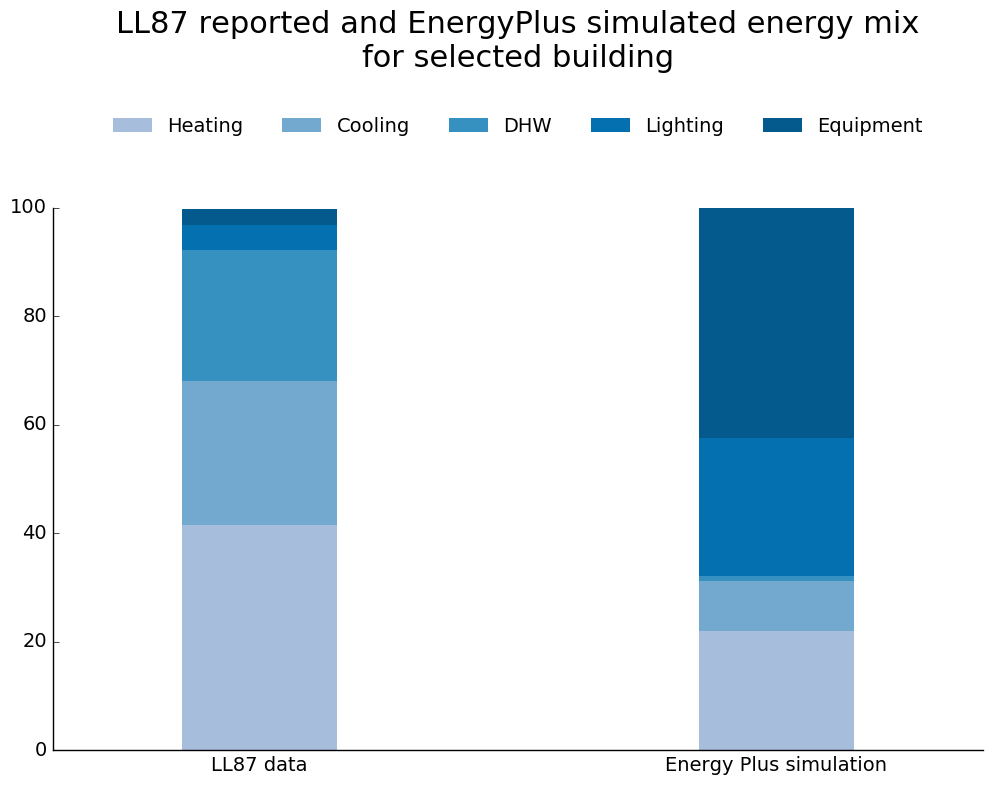

In [21]:
# Colorbar
puBu = ["#a6bddb", "#74a9cf", "#3690c0", "#0570b0", "#045a8d", "#023858"]

plt.figure(figsize=(9, 7))
dfpl.plot(kind='bar',stacked=True, width=0.3, color=puBu, edgecolor='none', 
         legend=True, figsize=(12, 7),ylim=[0,100])
plt.title('LL87 reported and EnergyPlus simulated energy mix\nfor selected building\n\n\n\n')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=False)
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.xticks(rotation=0)
#plt.savefig(r'..\Figures\actualVsimEnergyMix.png')
plt.show()